# TEXT MINING PROJECT - RESUME CLASSIFICATION

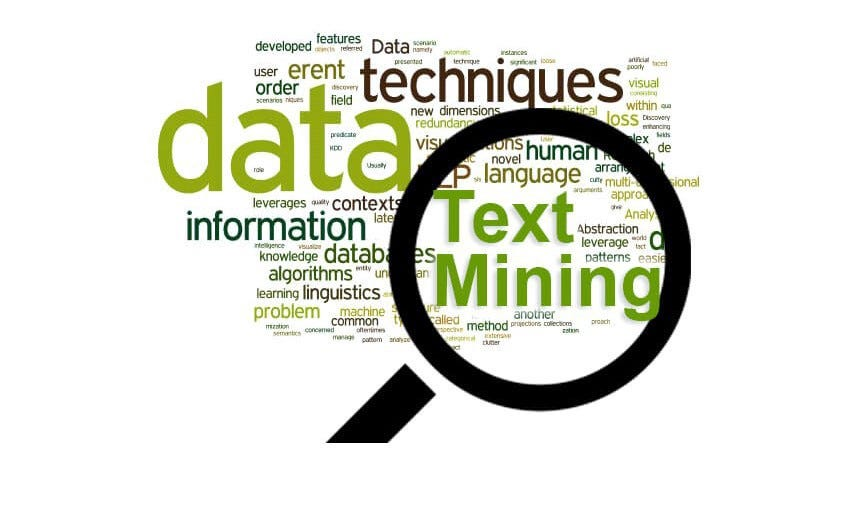

In [1]:
# Importing Necessary Libraries 
# Data partitioning
import numpy as np
import pandas as pd

# Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# data partioning
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix


# Text Preprocessing/ analyzing
from sklearn.feature_extraction.text import CountVectorizer 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
import string
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [2]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


## Exploratory Data Analysis(EDA)

In [3]:
# Loading the Dataset
df = pd.read_csv('/content/mydrive/MyDrive/Data Mining and Business Intelligence /Text-mining/Resume.csv')

In [4]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [6]:
# Rename the coloumn to text(predicting variable) and Label(predicted variable)
df.rename(columns = {"Resume_str": "text", 'Category': 'Label'}, 
          inplace = True)

In [7]:
# Dropping columns which does not contribute for predicition
df.drop(['ID', 'Resume_html'], axis=1, inplace = True)

In [8]:
classes_remove = ['AGRICULTURE', 'AUTOMOBILE', 'BPO']
df_filtered = df[~df['Label'].isin(classes_remove)]

# use the .drop() method to remove the filtered rows
df_filtered = df.drop(df[df['Label'].isin(classes_remove)].index)

In [9]:
# Shape of the filtered data
df_filtered.shape

(2363, 2)

In [10]:
df_filtered.head()

,text,Label
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [11]:
# ORIGINAL shape of the dataframe
df.shape

(2484, 2)

In [12]:
# Checking dimensions of the data
print("Number of rows : ", df_filtered.shape[0])
print("Number of Coloumns : ",  df_filtered.shape[1])


Number of rows :  2363
Number of Coloumns :  2


In [13]:
# Missing value identification
df_filtered.isnull().sum()

text     0
Label    0
dtype: int64

## Data Visualization

## Histogram showing frequency vs text length

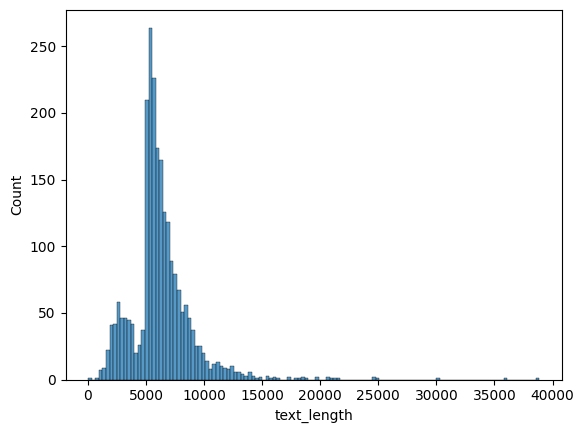

In [14]:
df_filtered['text_length'] =  df_filtered['text'].apply(len)
sns.histplot(data= df_filtered, x='text_length')
plt.show()

## Bar graph showing top 20 most frequent words in the document

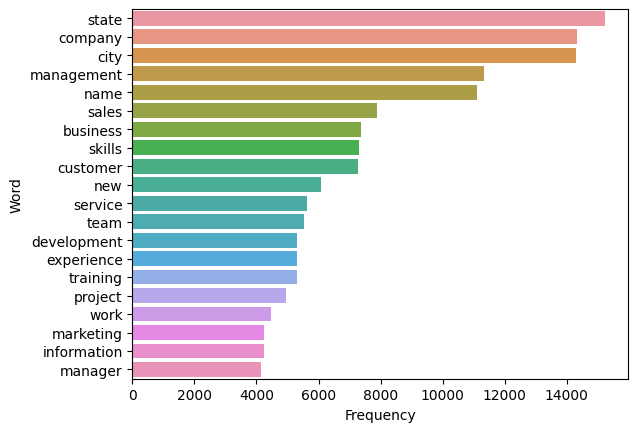

In [15]:

stop_words = set(stopwords.words('english'))
word_freq =  Counter()
for text in  df_filtered['text']:
    tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
    word_freq.update(tokens)

word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.show()

## Word Cloud before Preprocessing

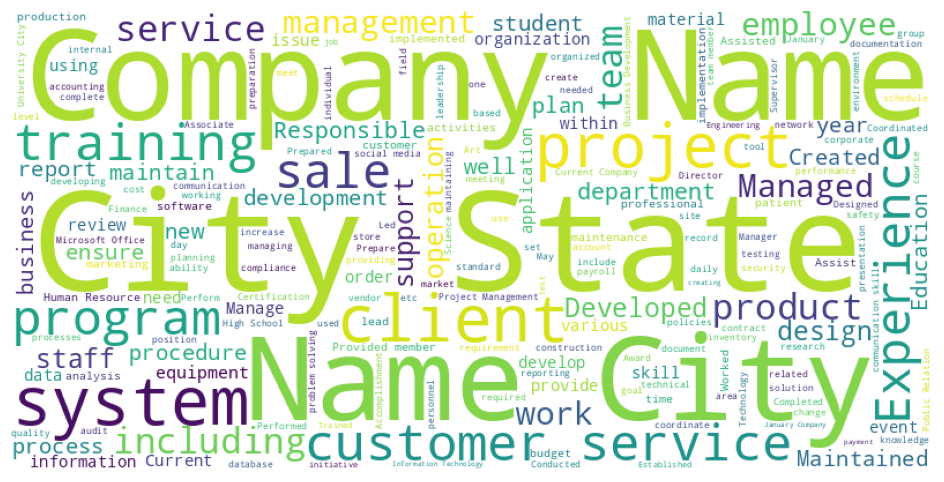

In [16]:
# This is the word cloud before doing pre-processing of the data 
text = ''.join( df_filtered['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Bargraph representing Category vs Count graph
* It shows our data is balanced  

In [17]:
# Counting different categories for predicting variables
from collections import Counter
Counter( df_filtered['Label'])

Counter({'HR': 110,
         'DESIGNER': 107,
         'INFORMATION-TECHNOLOGY': 120,
         'TEACHER': 102,
         'ADVOCATE': 118,
         'BUSINESS-DEVELOPMENT': 120,
         'HEALTHCARE': 115,
         'FITNESS': 117,
         'SALES': 116,
         'CONSULTANT': 115,
         'DIGITAL-MEDIA': 96,
         'CHEF': 118,
         'FINANCE': 118,
         'APPAREL': 97,
         'ENGINEERING': 118,
         'ACCOUNTANT': 118,
         'CONSTRUCTION': 112,
         'PUBLIC-RELATIONS': 111,
         'BANKING': 115,
         'ARTS': 103,
         'AVIATION': 117})

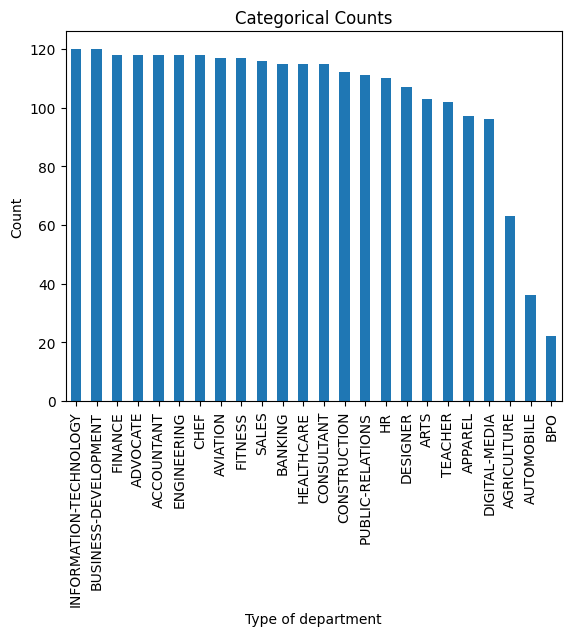

In [18]:
count =  df['Label'].value_counts()
count.plot(kind='bar')
plt.xlabel('Type of department')
plt.ylabel('Count')
plt.title("Categorical Counts")
plt.show()

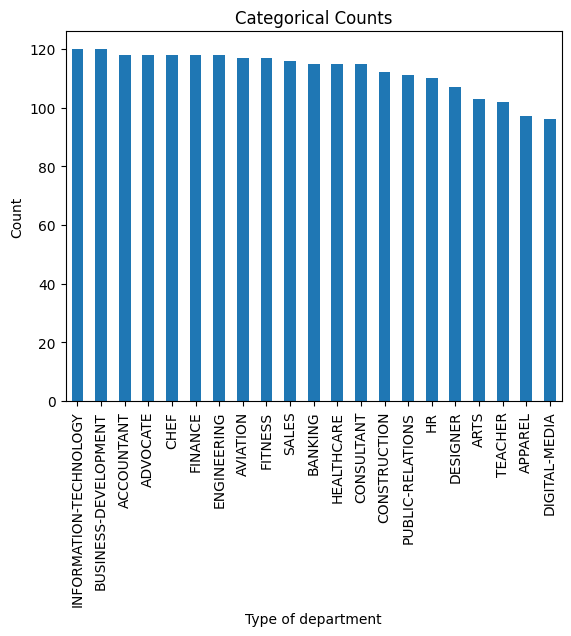

In [19]:
# This bargraph is after removing three categories 
count =  df_filtered['Label'].value_counts()
count.plot(kind='bar')
plt.xlabel('Type of department')
plt.ylabel('Count')
plt.title("Categorical Counts")
plt.show()

# Donut graph representing various vategories in label variable

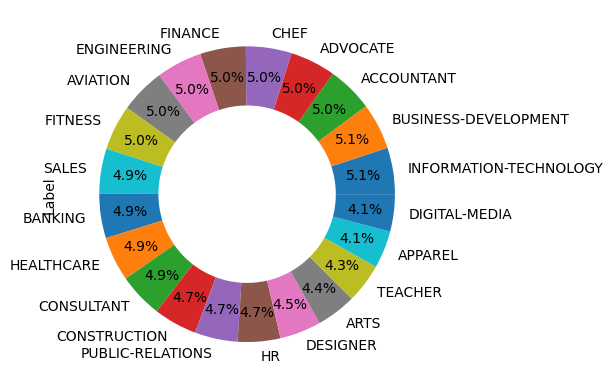

In [20]:
count.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.8, wedgeprops=dict(width=0.4))
plt.show()


# Label Encoding of the predicted variable using Label Encoder 

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_filtered['Label'] = le.fit_transform(df_filtered['Label'])

In [22]:
# Assigning text variable and Label variable to X and y
X =  df_filtered['text']
y =  df_filtered['Label']

# Preprocessing ot the data
* Step 1 is to remove punctuations from the document
* Secondly, we reoved digits from the document
* In the third, we used lower() method to convert it(document) into to lowercase.
* Step 4 involves to create tokens out of the text
* These newly generated tokens are then converted into their root words using Lemmatization
* Lastly, I removed Proper nouns from these tokens 

In [23]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    #  Step 1. reomove punctuations from the documents 
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Step 2. Remove digits from the documents 
    text = re.sub('\d+', '', text)
    # Step 3. Convert it to lower case
    text = text.lower()
    # Step 4. Create Tokens of the text
    tokens = nltk.word_tokenize(text)
    # Step 5. Lemmatise the text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens if word not in stop_words]
    # Step6. Removal of proper nouns
    tokens = [word for word, pos in pos_tag(tokens) if pos != 'NNP' and pos != 'NNPS']
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [24]:
X = X.apply(lambda x: preprocess_text(x))

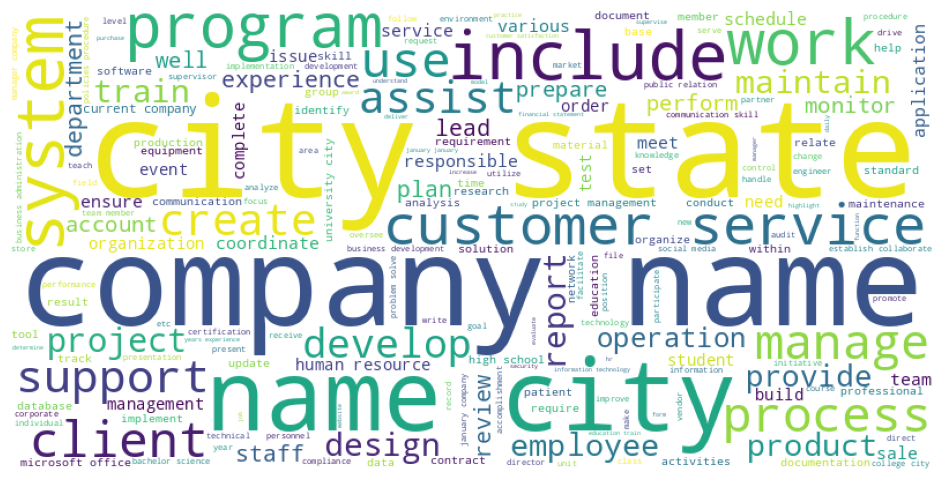

In [25]:
text = ''.join(X)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Word Cloud after Preprocessing and Modification

## Splitting the data into training and testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Converting text to numerical feature vector

In [27]:
vectorizer = TfidfVectorizer(min_df=4, max_df=0.7) 
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


# Models(Classification)

## 1. Support Vector classifier 

In [28]:
SVC = LinearSVC(random_state=42)
SVC.fit(X_train, y_train)

# Evaluate model
y_pred = SVC.predict(X_test)
y_pred_train = SVC.predict(X_train)
accuracy_testing_SVC = accuracy_score(y_test, y_pred)
accuracy_training_SVC = accuracy_score(y_train, y_pred_train)

# Training accuracy
print('Training Accuracy of Support Vector Classifier: ', accuracy_training_SVC)
# Testing accuracy
print('Testing Accuracy of Support Vector Classifier: ', accuracy_testing_SVC)
# Precision Score
precision = precision_score(y_test, y_pred, average='macro')
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred, average='macro')
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score:", f1)


Training Accuracy of Support Vector Classifier:  0.9978835978835979
Testing Accuracy of Support Vector Classifier:  0.6997885835095138
Precision score for testing: 0.7248637492041559
Recall score for testing: 0.6998595814070403
F1 score: 0.6923474904568159


<ipython-input-29-659a898b9750>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_pred, alpha=1, color='green', cmap='viridis', edgecolors='black')


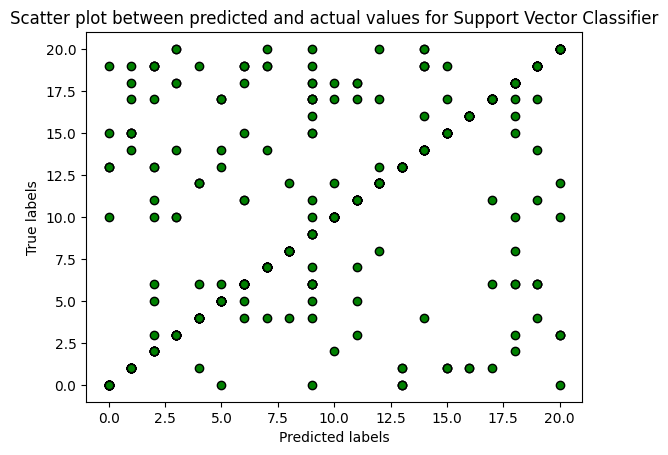

In [29]:
plt.title("Scatter plot between predicted and actual values for Support Vector Classifier")
plt.scatter(y_test, y_pred, alpha=1, color='green', cmap='viridis', edgecolors='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


##2. Naive Bayes 

In [30]:
NB = OneVsRestClassifier(MultinomialNB())
NB.fit(X_train, y_train)

# Model Evaluation
y_pred_train_NB = NB.predict(X_train)
y_pred_NB= NB.predict(X_test)
accuracy_testing_NB = accuracy_score(y_test, y_pred_NB)
accuracy_training_NB = accuracy_score(y_train,y_pred_train_NB)

# Training accuracy
print('Training Accuracy of Naive Bayes: ', accuracy_training_NB)
# Testing accuracy
print("Testing Accuracy of Naive Bayes", accuracy_testing_NB)
# Precision Score
precision = precision_score(y_test, y_pred_NB, average='macro', zero_division = 1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_NB, average='macro', zero_division = 1)
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_NB, average='macro', zero_division = 1)
print("F1 score:", f1)

Training Accuracy of Naive Bayes:  0.7365079365079366
Testing Accuracy of Naive Bayes 0.5644820295983086
Precision score for testing: 0.6340067986343675
Recall score for testing: 0.5601954416930235
F1 score: 0.5384862912932328


<ipython-input-31-249ecaebaef4>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_pred_NB, alpha=1, color='brown', cmap='viridis', edgecolors='black')


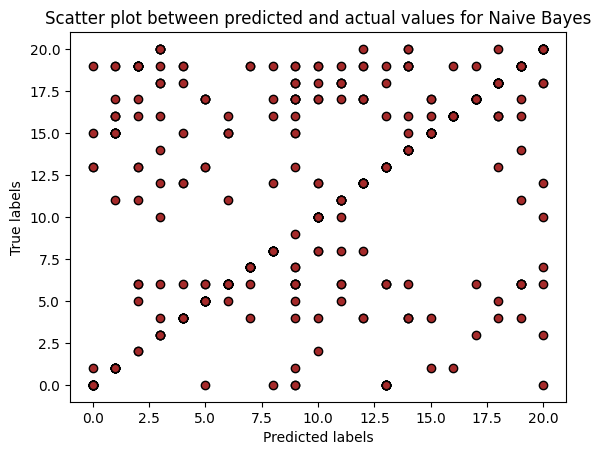

In [31]:
plt.title("Scatter plot between predicted and actual values for Naive Bayes")
plt.scatter(y_test, y_pred_NB, alpha=1, color='brown', cmap='viridis', edgecolors='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

## 3. Random Forest Classifier

In [32]:
RF = RandomForestClassifier(max_depth=40,n_estimators=100,random_state=42)
RF.fit(X_train, y_train)

# Model Evaluation
y_pred_train_RF = RF.predict(X_train)
y_pred_RF = RF.predict(X_test)
accuracy_testing_RF = accuracy_score(y_test, y_pred_RF)
accuracy_training_RF = accuracy_score(y_train,y_pred_train_RF)

# Training accuracy
print('Training Accuracy of Random Forest: ', accuracy_training_RF)
# Testing accuracy
print("Testing Accuracy of Random Forest: ", accuracy_testing_RF)
# Precision Score
precision = precision_score(y_test, y_pred_RF, average='macro', zero_division = 1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_RF, average='macro', zero_division = 1)
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_RF, average='macro', zero_division = 1)
print("F1 score:", f1)

Training Accuracy of Random Forest:  0.9994708994708995
Testing Accuracy of Random Forest:  0.6638477801268499
Precision score for testing: 0.6877846960178601
Recall score for testing: 0.661302533264848
F1 score: 0.6517486131240673


<ipython-input-33-076c282949e4>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_pred_RF, alpha=1, color='violet', cmap='viridis', edgecolors='black')


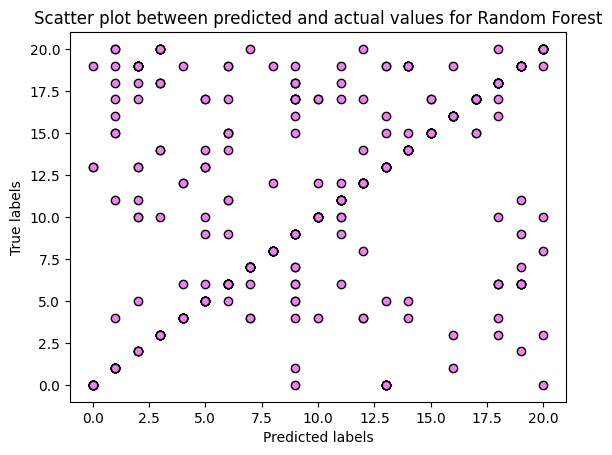

In [33]:
plt.title("Scatter plot between predicted and actual values for Random Forest")
plt.scatter(y_test, y_pred_RF, alpha=1, color='violet', cmap='viridis', edgecolors='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

##4. Logistic Regression 

In [34]:
LR = LogisticRegression(multi_class = 'multinomial' , solver = 'lbfgs')
LR.fit(X_train, y_train)

# Model evaluation
y_pred_train_LR = LR.predict(X_train)
y_pred_LR = LR.predict(X_test)
accuracy_testing_LR = accuracy_score(y_test, y_pred_LR)
accuracy_training_LR = accuracy_score(y_train,y_pred_train_LR)


# Training accuracy
print('Training Accuracy of Logistic Regression : ', accuracy_training_LR)
# Testing accuracy
print("Testing Accuracy of Logistic Regression : ", accuracy_testing_LR)
# Precision Score
precision = precision_score(y_test, y_pred_LR, average='macro', zero_division=1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_LR, average='macro',zero_division=1 )
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_LR, average='macro', zero_division=1)
print("F1 score:", f1)

Training Accuracy of Logistic Regression :  0.8444444444444444
Testing Accuracy of Logistic Regression :  0.6490486257928119
Precision score for testing: 0.6690634505459216
Recall score for testing: 0.6466014365802198
F1 score: 0.637845675602779


<ipython-input-35-9752fc3f5ba6>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_pred_LR, alpha=1, color='purple', cmap='viridis', edgecolors='black')


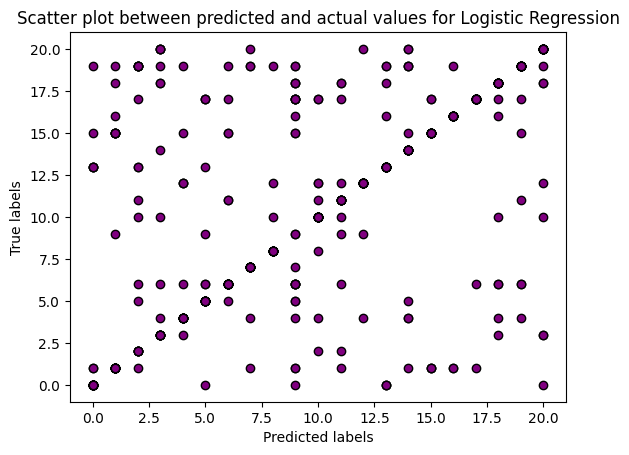

In [35]:
plt.title("Scatter plot between predicted and actual values for Logistic Regression")
plt.scatter(y_test, y_pred_LR, alpha=1, color='purple', cmap='viridis', edgecolors='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

## 5. Gradient Boosting Classifier

In [36]:
GB = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
GB.fit(X_train, y_train)

# Model evaluation
y_pred_train_GB = GB.predict(X_train)
y_pred_GB = GB.predict(X_test)
accuracy_testing_GB = accuracy_score(y_test, y_pred_GB)
accuracy_training_GB = accuracy_score(y_train,y_pred_train_GB)


# Training accuracy
print('Training Accuracy of Gradient Boosting : ', accuracy_training_GB)
# Testing accuracy
print("Testing Accuracy of Gradient Boosting : ", accuracy_testing_GB)
# Precision Score
precision = precision_score(y_test, y_pred_GB, average='macro', zero_division=1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_GB, average='macro',zero_division=1 )
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_GB, average='macro', zero_division=1)
print("F1 score:", f1)





Training Accuracy of Gradient Boosting :  0.9994708994708995
Testing Accuracy of Gradient Boosting :  0.7167019027484144
Precision score for testing: 0.737468293352169
Recall score for testing: 0.7097100323738691
F1 score: 0.7155864056850219


In [37]:
GB.feature_importances_.shape

(8863,)

##6. Decision Tree Classifier 

In [38]:
DT = DecisionTreeClassifier()
param_grid = {
    'max_depth': [10,20,30,40],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5,10,15],
    'max_features': ['sqrt', 'log2']
}

#DT.fit(X_train, y_train)
grid_search = GridSearchCV(DT, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ",grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 15}
Best score:  0.33544973544973544


In [39]:
DT = DecisionTreeClassifier(max_depth = 40, min_samples_leaf = 5, min_samples_split = 15)
DT.fit(X_train, y_train)

# Model evaluation
y_pred_train_DT = DT.predict(X_train)
y_pred_DT = DT.predict(X_test)
accuracy_testing_DT = accuracy_score(y_test, y_pred_DT)
accuracy_training_DT = accuracy_score(y_train,y_pred_train_DT)


# Training accuracy
print('Training Accuracy of Decision Tree : ', accuracy_training_DT)
# Testing accuracy
print("Testing Accuracy of Decision Tree : ", accuracy_testing_DT)
# Precision Score
precision = precision_score(y_test, y_pred_DT, average='macro', zero_division=1)
print("Precision score for testing:", precision)
# Recall Score
recall = recall_score(y_test, y_pred_DT, average='macro',zero_division=1 )
print("Recall score for testing:", recall)
# F-1 score
f1 = f1_score(y_test, y_pred_DT, average='macro', zero_division=1)
print("F1 score:", f1)


Training Accuracy of Decision Tree :  0.8132275132275132
Testing Accuracy of Decision Tree :  0.6300211416490487
Precision score for testing: 0.6410050701052005
Recall score for testing: 0.6306555093305777
F1 score: 0.6310350916487251


<ipython-input-40-e242d5318c0e>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_pred_DT, alpha=0.7, color='blue', cmap='viridis', edgecolors='black')


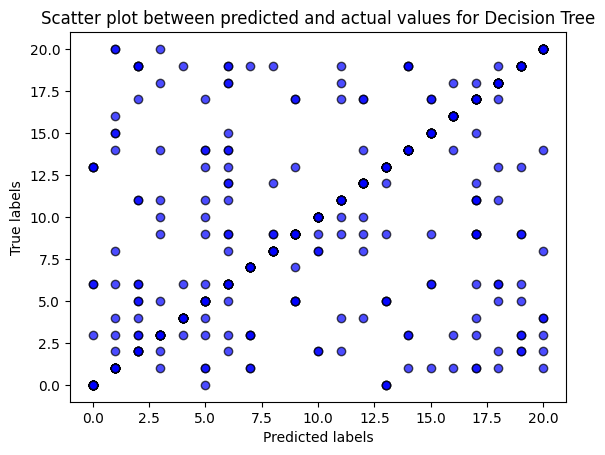

In [40]:
plt.title("Scatter plot between predicted and actual values for Decision Tree")
plt.scatter(y_test, y_pred_DT, alpha=0.7, color='blue', cmap='viridis', edgecolors='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

## Confusion Matrix for the best model(Gradient Boosting Classifier)

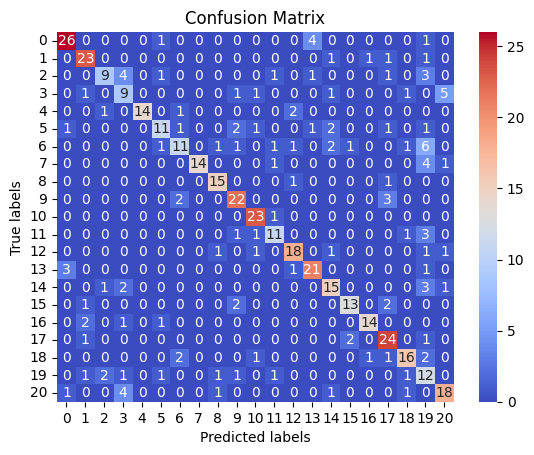

In [41]:
# Confusion Matrix for Gradient Boosted Tree Classifier 
conf_matrix = confusion_matrix(y_test, y_pred_GB)
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()



## Scatter Plot between predicted and actual values (GBC)

<ipython-input-42-06e75f1a3ae7>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_pred_GB, alpha=1, color='red', cmap='viridis', edgecolors='black')


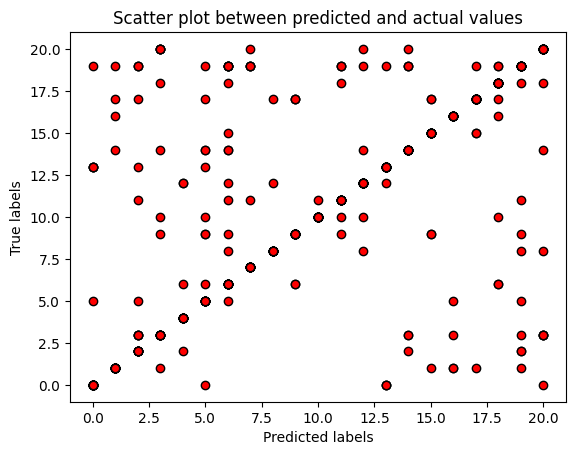

In [42]:
plt.title("Scatter plot between predicted and actual values")
plt.scatter(y_test, y_pred_GB, alpha=1, color='red', cmap='viridis', edgecolors='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()